In [81]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt 


In [92]:
path = 'ensemble-metadata'
all_files = glob.glob(path + "/*inc_case-model-eligibility.csv")

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    date = "-".join(filename.split("/")[-1].split("-")[:3])
    if date == "2021-03-15":
        break
    df = df[(df.location=="US") & (df.overall_eligibility=="eligible")][["model", "overall_eligibility", "location"]]

    df["forecast_date"]=date
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [99]:
df = pd.read_csv("ensemble-metadata/2021-03-22-inc_case-model-weights.csv", index_col=None, header=0)

In [100]:
df[df["locations"]=="US"]

,BPagano-RtDriven,CEID-Walk,CMU-TimeSeries,Columbia_UNC-SurvCon,Covid19Sim-Simulator,CovidAnalytics-DELPHI,COVIDhub-baseline,CU-select,DDS-NBDS,FAIR-NRAR,...,TTU-squider,UCF-AEM,UChicagoCHATTOPADHYAY-UnIT,UCLA-SuEIR,UMass-MechBayes,UMich-RidgeTfReg,UpstateSU-GRU,USC-SI_kJalpha,UVA-Ensemble,locations
3198,1,1,0,1,1,1,1,1,1,0,...,0,1,0,1,0,1,1,1,1,US


In [101]:
frame[frame["forecast_date"]=="2021-03-22"]

,model,overall_eligibility,location,forecast_date
732,BPagano-RtDriven,eligible,US,2021-03-22
733,CEID-Walk,eligible,US,2021-03-22
734,Columbia_UNC-SurvCon,eligible,US,2021-03-22
735,Covid19Sim-Simulator,eligible,US,2021-03-22
736,CovidAnalytics-DELPHI,eligible,US,2021-03-22
737,COVIDhub-baseline,eligible,US,2021-03-22
738,CU-select,eligible,US,2021-03-22
739,DDS-NBDS,eligible,US,2021-03-22
740,FRBSF_Wilson-Econometric,eligible,US,2021-03-22
741,IEM_MED-CovidProject,eligible,US,2021-03-22


In [66]:
check_eligiblity(frame, "CovidAnalytics-DELPHI", "2020-11-16")

True

<AxesSubplot:xlabel='forecast_date'>

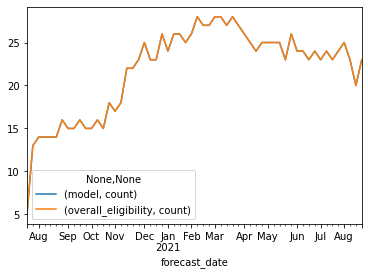

In [80]:
frame.groupby(['forecast_date']).agg(['count']).plot()

In [77]:
frame.forecast_date=pd.to_datetime(frame.forecast_date)

In [78]:
frame

,model,overall_eligibility,forecast_date
0,BPagano-RtDriven,eligible,2020-11-16
1,CEID-Walk,eligible,2020-11-16
2,Columbia_UNC-SurvCon,eligible,2020-11-16
3,CovidAnalytics-DELPHI,eligible,2020-11-16
4,COVIDhub-baseline,eligible,2020-11-16
...,...,...,...
1260,LANL-GrowthRate,eligible,2020-08-17
1261,LNQ-ens1,eligible,2020-08-17
1262,RobertWalraven-ESG,eligible,2020-08-17
1263,UCLA-SuEIR,eligible,2020-08-17
